In [1]:
from modelos import *
import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_classification(r0=1, r1=3, k=1000):
    """
    Creación de los datos
    """
    X1 = [np.array([r0*np.cos(t), r0*np.sin(t)]) for t in range(0,k)]
    X2 = [np.array([r1*np.cos(t), r1*np.sin(t)]) for t in range(0,k)]

    X = np.concatenate((X1,X2))
    n, d = X.shape
    Y = np.zeros(2*k)
    Y[k:] += 1
    noise = np.array([np.random.normal(0,1,2) for i in range(n)])

    return X, Y

In [3]:
X, y = make_classification()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

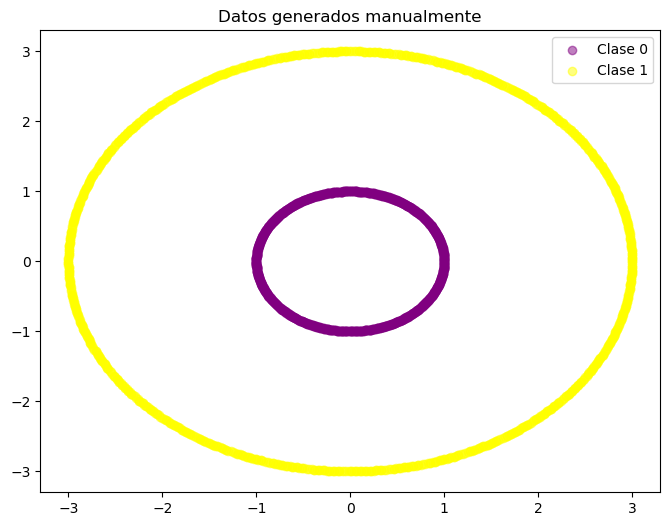

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:,1], color='purple', label='Clase 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:,1], color='yellow', label='Clase 1', alpha=0.5)
plt.title('Datos generados manualmente')
plt.legend()
plt.show()

In [6]:
# vamos a utilizar nuestros nodos (definir nuestra arquitectura)

# solo es la idea del forward

#funcion de pre-activacion
# este primer nodo tiene como entrada 2 porque son el numero de clases en nuestros datos
# y el output_size seran el numero de unidades de la siguiente capa, o sea que la siguiente capa
# tiene 10 unidades
nodo_capa_entrada = Linear(input_size=2, output_size=10)
#funcion de activacion para la primera capa (capa con 10 unidades)
nodo_ReLU = ReLU()
#funcion de pre-activacion (funciona como la salida de la primera capa)

# aquí volvemos a definir las unidades de la capa actual y de la siguiente
# en nuestra primer capa teniamos 10 unidades, entonces el input_size tiene que ser del mismo tamaño
# que el output_size de la capa anterior. Tambien volvemos a definir 10 unidades para la siguiente capa
nodo_salida_1 = Linear(input_size=10, output_size=10)

# funcion de activacion (aqui empezamos con la segunda capa formada con 10 unidades y la capa tendrá 2 unidades de salida, una por cada clase)
# para la segunda capa usaremos com función de activacion la Tanh
nodo_tanh = Tanh()
# salida de toda la red
nodo_salida_2 = Linear(input_size=10, output_size=2)
# activacion para la capa de salida, nos da las probabilidades, así como la funcion sigmoide
nodo_softmax = Softmax()

# vamos a conectar nuestros nodos

pre_activacion_capa_entrada = nodo_capa_entrada.forward(x_train)         # Linear(2,10) <------------------- Capa de entrada
salida_activacion_ReLU = nodo_ReLU.forward(pre_activacion_capa_entrada)  # ReLU()  <------------------------ Primera capa oculta
pre_activacion_capa_1 = nodo_salida_1.forward(salida_activacion_ReLU)    # Linear(10,10) <------------------ Primera capa oculta y Segunda capa oculta
salida_activacion_Tanh  = nodo_tanh(pre_activacion_capa_1)               # Tanh()  2da capa oculta <-------- Segunda capa oculta
pre_activacion_capa_2 = nodo_salida_2.forward(salida_activacion_Tanh)    # Linear(10,2) <------------------- Capa de salida
salida_red = nodo_softmax.forward(pre_activacion_capa_2)                 # Softmax() <---------------------- activacion capa de salida

#funcion objetivo
R = CrossEntropy()
error = R.forward(y_train, salida_red)

In [7]:
error

17.170705979184167

In [17]:
from sklearn.metrics import classification_report
Y_pred = np.argmax(salida_red, axis=1)
report = classification_report(y_train, Y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       704
         1.0       0.50      1.00      0.66       696

    accuracy                           0.50      1400
   macro avg       0.75      0.50      0.33      1400
weighted avg       0.75      0.50      0.33      1400

